In [1]:
import pandas as pd
data_HM=pd.read_excel('1a数据_已替换时间戳_已矫正.xlsx')
ID_column = data_HM.pop('ID')  # 删除 'ID' 列并返回该列
data_HM.insert(0, 'ID', ID_column)  # 在第一列插入 'ID' 列
data_ED=pd.read_excel('2a数据_已替换时间戳_已矫正.xlsx')
data_ED.rename(columns={'ED_volume.0':'ED_volume'},inplace=True)
data_ED.drop('发病到首次影像检查时间间隔',axis=1,inplace=True)
data_HM.columns,data_ED.columns

(Index(['ID', '入院首次影像检查流水号', 'HM_volume', '随访1流水号', 'HM_volume.1', '随访2流水号',
        'HM_volume.2', '随访3流水号', 'HM_volume.3', '随访4流水号', 'HM_volume.4',
        '随访5流水号', 'HM_volume.5', '随访6流水号', 'HM_volume.6', '随访7流水号',
        'HM_volume.7', '随访8流水号', 'HM_volume.8'],
       dtype='object'),
 Index(['ID', '入院首次影像检查流水号', 'ED_volume', '随访1流水号', 'ED_volume.1', '随访2流水号',
        'ED_volume.2', '随访3流水号', 'ED_volume.3', '随访4流水号', 'ED_volume.4',
        '随访5流水号', 'ED_volume.5', '随访6流水号', 'ED_volume.6', '随访7流水号',
        'ED_volume.7', '随访8流水号', 'ED_volume.8'],
       dtype='object'))

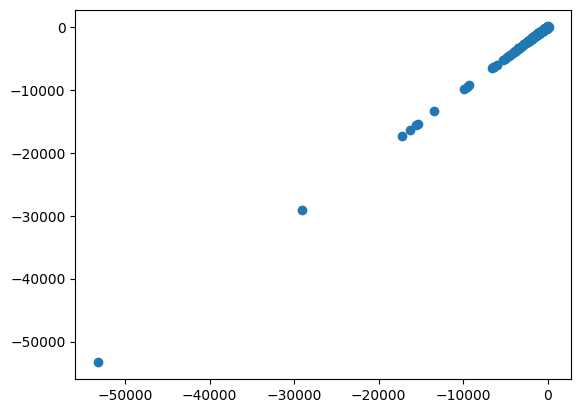

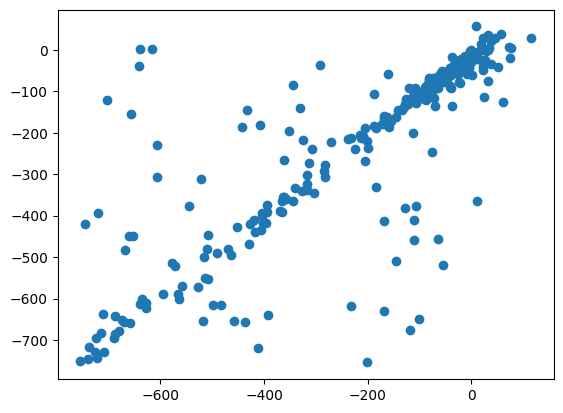

In [2]:
HM=[]
ED=[]
for i in range(len(list(data_HM.columns))):
    if list(data_HM.columns)[i][-2]=='.':
        for j in range(len(data_HM[list(data_HM.columns)[i]])):
            HM.append((data_HM[list(data_HM.columns)[i]][j]-data_HM[list(data_HM.columns)[i-1]][j])/1000)
            ED.append((data_ED[list(data_ED.columns)[i]][j]-data_ED[list(data_ED.columns)[i-1]][j])/1000)

import matplotlib.pyplot as plt
plt.scatter(HM,ED)
plt.show()

for k in range(160):
    HM.remove(min(HM))
    ED.remove(min(ED))

import matplotlib.pyplot as plt
plt.scatter(HM,ED)
plt.show()

In [ ]:
from scipy import optimize


#线性
def liner_func(x,a,b):
    return a*x+b

#二次
def erchi_func(x,a,b,c):
    return a*x**2+b*x+c

#三次
def sanchi_func(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

# 三角函数
def trig_func(x,a,b,c):
    return a*np.sin(x)+b*np.cos(x)+c
# 指数曲线
def target_func(x, a, b, c):
    return a * np.exp(-x / b) + c
# 对数函数
def hyp_func(x, a,b):
    return a*np.log(x)+b

# 定义高斯函数
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

#定义Logistic函数
def logistic(x,a,b,c):
    return  a / (1 + np.exp(-b * (x - c)))


def __sst(y_no_fitting):
    """
    计算SST(total sum of squares) 总平方和
    :param y_no_predicted: List[int] or array[int] 待拟合的y
    :return: 总平方和SST
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_no_fitting]
    sst = sum(s_list)
    return sst


def __ssr(y_fitting, y_no_fitting):
    """
    计算SSR(regression sum of squares) 回归平方和
    :param y_fitting: List[int] or array[int]  拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 回归平方和SSR
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_fitting]
    ssr = sum(s_list)
    return ssr


def __sse(y_fitting, y_no_fitting):
    """
    计算SSE(error sum of squares) 残差平方和
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 残差平方和SSE
    """
    s_list = [(y_fitting[i] - y_no_fitting[i])**2 for i in range(len(y_fitting))]
    sse = sum(s_list)
    return sse


def goodness_of_fit(y_fitting, y_no_fitting):
    """
    计算拟合优度R^2
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 拟合优度R^2
    """
    SSR = __ssr(y_fitting, y_no_fitting)
    SST = __sst(y_no_fitting)
    rr = SSR /SST
    return rr
def selected_func(you,model,model_select):
    maxyou=max(you)
    for s in range(len(you)):
        if you[s]==maxyou:
            
            return model[s],model_select[s]
        
    

def is_non_real(x):
    # 判断复数是否为非实数
    return math.isinf(x) or math.isnan(x)

def sgn(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1
        
#========================粒子群=======================================
# import numpy as np

# def particle_swarm_optimization(mm, objective_func, num_particles, max_iterations,parm):
#     # 初始化参数
#     dimensions = 1
#     inertia = 0.5  # 惯性权重
#     cognitive_weight = 0.2  # 学习因子
#     social_weight = 0.2  # 学习因子
#     min_bound = 0  # 变量的最小边界
#     max_bound = 48  # 变量的最大边界

#     # 初始化粒子的位置和速度
#     particles = np.random.uniform(min_bound, max_bound, (num_particles, dimensions))
#     velocities = np.zeros((num_particles, dimensions))
#     if mm==1:
#         # 初始化粒子的局部最佳位置和全局最佳位置
#         personal_best_positions = particles.copy()
#         global_best_position = particles[np.argmin(objective_func(particles,parm[0],parm[1],parm[2],parm[3]))]

#         # 迭代更新粒子的速度和位置
#         for _ in range(max_iterations):
#             for i in range(num_particles):
#                 # 更新粒子的速度
#                 velocities[i] = (inertia * velocities[i] +
#                                 cognitive_weight * np.random.rand() * (personal_best_positions[i] - particles[i]) +
#                                 social_weight * np.random.rand() * (global_best_position - particles[i]))

#                 # 限制速度范围
#                 velocities[i] = np.clip(velocities[i], min_bound, max_bound)

#                 # 更新粒子的位置
#                 particles[i] += velocities[i]

#                 # 限制位置范围
#                 particles[i] = np.clip(particles[i], min_bound, max_bound)

#                 # 更新局部最佳位置和全局最佳位置
#                 if objective_func(particles[i],parm[0],parm[1],parm[2],parm[3]) < objective_func(personal_best_positions[i],parm[0],parm[1],parm[2],parm[3]):
#                     personal_best_positions[i] = particles[i]

#                 if objective_func(particles[i],parm[0],parm[1],parm[2],parm[3]) < objective_func(global_best_position,parm[0],parm[1],parm[2],parm[3]):
#                     global_best_position = particles[i]
#         return global_best_position, objective_func(global_best_position,parm[0],parm[1],parm[2],parm[3])
#     if mm==-1:
#         # 初始化粒子的局部最佳位置和全局最佳位置
#         personal_best_positions = particles.copy()
#         global_best_position = particles[np.argmin(-objective_func(particles,parm[0],parm[1],parm[2],parm[3]))]

#         # 迭代更新粒子的速度和位置
#         for _ in range(max_iterations):
#             for i in range(num_particles):
#                 # 更新粒子的速度
#                 velocities[i] = (inertia * velocities[i] +
#                                 cognitive_weight * np.random.rand() * (personal_best_positions[i] - particles[i]) +
#                                 social_weight * np.random.rand() * (global_best_position - particles[i]))

#                 # 限制速度范围
#                 velocities[i] = np.clip(velocities[i], min_bound, max_bound)

#                 # 更新粒子的位置
#                 particles[i] += velocities[i]

#                 # 限制位置范围
#                 particles[i] = np.clip(particles[i], min_bound, max_bound)

#                 # 更新局部最佳位置和全局最佳位置
#                 if -objective_func(particles[i],parm[0],parm[1],parm[2],parm[3]) < -objective_func(personal_best_positions[i],parm[0],parm[1],parm[2],parm[3]):
#                     personal_best_positions[i] = particles[i]

#                 if -objective_func(particles[i],parm[0],parm[1],parm[2],parm[3]) < -objective_func(global_best_position,parm[0],parm[1],parm[2],parm[3]):
#                     global_best_position = particles[i]
#         # 输出结果
#         return global_best_position, -objective_func(global_best_position,parm[0],parm[1],parm[2],parm[3])
#========================粒子群=======================================
# 求解方程 f(x) = y
def solve_equation(f,y):
    equation = lambda x: f(x) - y
    x_initial_guess = 0  # 初始猜测值
    x_solution = fsolve(equation, x_initial_guess)
    return x_solution
       
x=HM
y=ED
print(HM,ED)
Set={}
youSet={}
resSet={}
resTime={}
# for index, row in selected_df.iterrows():
#     if index >= 100:
#         break
#     # 去除NaN值
    # data = row.values[~np.isnan(row.values)]
    # # 将数据分成x和y坐标对
    # x = data[::2] / (3600 )
    # y = data[1::2]/1000
you=[]
model=[]
model_select=[]
you_index={}
RMR=[]
try:
    a1 = np.polyfit(x, y, 1)#线性
    you1 = goodness_of_fit([liner_func(x[p],a1[0],a1[1]) for p in range(len(x))],y)
    you.append(you1)
    rmr1=[round(liner_func(x[p],a1[0],a1[1])-y[p],4) for p in range(len(x))]
    model.append({'回归类型':'线性回归','回归系数':a1,'残差':rmr1,'ID':ID})
    you_index['线性回归']=you1
    model_select.append((liner_func,a1))
except:
    pass

try:
    a2 = np.polyfit(x, y, 2)#二次
    you2 = goodness_of_fit([erchi_func(x[p],a2[0],a2[1],a2[2]) for p in range(len(x))],y)
    rmr2=[round(erchi_func(x[p],a2[0],a2[1],a2[2])-y[p],4) for p in range(len(x))]
    you.append(you2)
    model.append({'回归类型':'二次函数回归','回归系数':a2,'残差':rmr2,'ID':ID})
    you_index['二次函数回归']=you2
    model_select.append((erchi_func,a2))
except:
    pass

try:
    a3 = np.polyfit(x, y, 3)#三次
    you3 = goodness_of_fit([sanchi_func(x[p],a3[0],a3[1],a3[2],a3[3]) for p in range(len(x))],y)
    rmr3=[round(sanchi_func(x[p],a3[0],a3[1],a3[2],a3[3])-y[p],4) for p in range(len(x))]
    you.append(you3)
    model.append({'回归类型':'三次函数回归','回归系数':a3,'残差':rmr3,'ID':ID})
    you_index['三次函数回归']=you3
    model_select.append((sanchi_func,a3))
except:
    pass

#拟合三角函数模型
try:
    a4,_=optimize.curve_fit(trig_func,x,y)
    you4 = goodness_of_fit([trig_func(x[p],a4[0],a4[1],a4[2]) for p in range(len(x))],y)
    rmr4=[round(trig_func(x[p],a4[0],a4[1],a4[2])-y[p],4) for p in range(len(x))]
    you.append(you4)
    model.append({'回归类型':'三角函数回归','回归系数':a4,'残差':rmr4,'ID':ID})
    you_index['三角函数回归']=you4
    model_select.append((trig_func,a4))

except:
    pass

#拟合指数函数模型
try:
    a5,_=optimize.curve_fit(target_func,x,y)
    you5 = goodness_of_fit([target_func(x[p], a5[0], a5[1], a5[2]) for p in range(len(x))],y)
    rmr5=[round(target_func(x[p], a5[0], a5[1], a5[2])-y[p],4) for p in range(len(x))]
    you.append(you5)
    model.append({'回归类型':'指数函数回归','回归系数':a5,'残差':rmr5,'ID':ID})
    you_index['指数函数回归']=you5
    model_select.append((target_func,a5))
except:
    pass

#拟合对数函数模型
try:
    a6,_=optimize.curve_fit(hyp_func,x,y)
    you6 = goodness_of_fit([hyp_func(x[p], a6[0],a6[1]) for p in range(len(x))],y)
    rmr6=[round(hyp_func(x[p], a6[0],a6[1])-y[p],4) for p in range(len(x))]
    you.append(you6)
    model.append({'回归类型':'对数函数回归','回归系数':a6,'残差':rmr6,'ID':ID})
    you_index['对数函数回归']=you6
    model_select.append((hyp_func,a6))
except:
    pass
try:
    popt, pcov = optimize.curve_fit(gaussian, x, y)
    # 提取拟合参数
    a_fit, b_fit, c_fit = popt
    
    you7 = goodness_of_fit([gaussian(x[p], a_fit,b_fit,c_fit) for p in range(len(x))],y)
    rmr7=[round(gaussian(x[p], a_fit,b_fit,c_fit)-y[p],4) for p in range(len(x))]
    you.append(you7)
    model.append({'回归类型':'高斯函数回归','回归系数':popt,'残差':rmr7,'ID':ID})
    you_index['高斯函数回归']=you7
    model_select.append((gaussian,popt))
except:
    pass

try:
    popt, pcov = optimize.curve_fit(logistic, x, y)
    # 提取拟合参数
    a_fit, b_fit, c_fit = popt
    you8 = goodness_of_fit([logistic(x[p], a_fit,b_fit,c_fit) for p in range(len(x))],y)

    rmr8=[round(logistic(x[p], a_fit,b_fit,c_fit)-y[p],4) for p in range(len(x))]
    you.append(you8)
    model.append({'回归类型':'logistic函数回归','回归系数':popt,'残差':rmr8,'ID':ID})
    you_index['logistic函数回归']=you8
    model_select.append((logistic,popt))

except:
    pass
print(you_index)
# model=[f'线性回归，系数为{a1}',f'二次函数回归，系数为{a2}',f'三次函数回归，系数为{a3}',f'三角函数回归，系数为{a4}',f'指数函数回归，系数为{a5}',f'对数函数回归，系数为{a6}']
# res,model_=selected_func(you,model,model_select)

# Set[index]=res#选择函数模型，例如：1用三角函数
# youSet[index]=you_index#拟合优度

# print(you_index)
# p=0 #取最大
# for i in range(len(list(you_index.keys()))):
#     if you_index[list(you_index.keys())[i]]>you_index[list(you_index.keys())[p]]:
#         p=i

# print(model[p])